In [1]:
import pandas as pd
from tqdm import tqdm
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from collections import defaultdict

In [ ]:
df1 = pd.DataFrame(pd.read_csv('./data/ijcai2016_taobao.csv',header=0))

In [ ]:
user_seller_maps = {}
for i in tqdm(range(len(df1))):
    if df1.iloc[i].use_ID not in user_seller_maps:
        user_seller_maps[df1.iloc[i].use_ID] = {}
        user_seller_maps[df1.iloc[i].use_ID][df1.iloc[i].sel_ID] = 1
    else:
        if df1.iloc[i].sel_ID not in user_seller_maps[df1.iloc[i].use_ID]:
            user_seller_maps[df1.iloc[i].use_ID][df1.iloc[i].sel_ID] = 1
        else:
            user_seller_maps[df1.iloc[i].use_ID][df1.iloc[i].sel_ID] += 1

In [ ]:
user_new_old_id_maps = {}
user_old_new_id_maps = {}
count = 0
for u in tqdm(user_seller_maps):
    user_new_old_id_maps[count] = u
    user_old_new_id_maps[u] = count
    count += 1

In [ ]:
user_seller_matrix = np.zeros((len(user_seller_maps), 10000))
for i in tqdm(user_seller_maps):
    for j in user_seller_maps[i]:
        user_seller_matrix[user_old_new_id_maps[i]][j-1] = user_seller_maps[i][j]

In [ ]:
print(user_seller_matrix.shape)
np.save("user_seller_matrix.npy", user_seller_matrix)

In [ ]:
# SVD, Matrix Factorization
from sklearn.decomposition import NMF
# user_seller_matrix

# S = np.random.rand(10000, 10000)
# for i in tqdm(range(2, 11)):
nmf_model = NMF(n_components=10) 
seller_dis = nmf_model.fit_transform(user_seller_matrix)
user_dis = nmf_model.components_
print(seller_dis.shape, user_dis.shape)
print(nmf_model.reconstruction_err_)

In [ ]:
user_df = pd.DataFrame(user_dis.T)
user_df[:10]

In [ ]:
seller_df = pd.DataFrame(seller_dis)
seller_df[:10]

In [ ]:
np.save("user_dis.npy", user_dis)
np.save("seller_dis.npy", seller_dis)

In [ ]:
user_seller_matrix = np.load("user_seller_matrix.npy")

/Users/billywang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


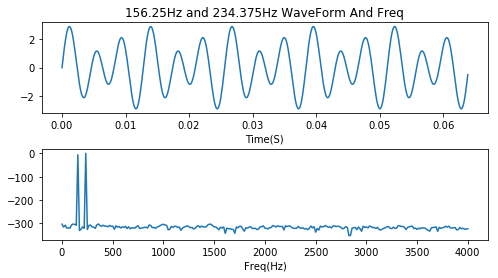

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pylab as pl
sampling_rate = 8000
fft_size = 512
t = np.arange(0, 1.0, 1.0/sampling_rate)
x = np.sin(2*np.pi*156.25*t) + 2*np.sin(2*np.pi*234.375*t)
xs = x[:fft_size]
xf = np.fft.rfft(xs)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
pl.figure(figsize=(8,4))
pl.subplot(211)
pl.plot(t[:fft_size], xs)
pl.xlabel(u"Time(S)")
pl.title(u"156.25Hz and 234.375Hz WaveForm And Freq")
pl.subplot(212)
pl.plot(freqs, xfp)
pl.xlabel(u"Freq(Hz)")
pl.subplots_adjust(hspace=0.4)
pl.show()